In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

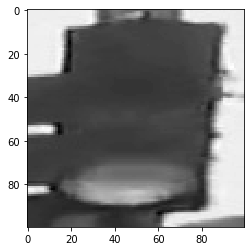

In [11]:
DATADIR='/Users/VEDANT MEHTA/Desktop/projectwork(4 july)/CNN projectWork/dataset/collection_resized_gray'
CATEGORIES=['green','red','yellow']
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break
    

In [12]:
print(img_array.shape)

(100, 100)


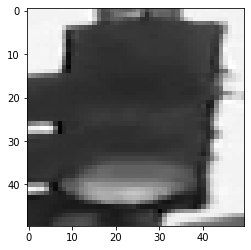

In [17]:
img_size=50
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [45]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category) #0-Green,1-Red,2-Yellow
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [46]:
print(len(training_data))

169


In [47]:
import random
random.shuffle(training_data)


In [48]:
for sample in training_data[0:10]:
    print(sample[1])

0
0
0
1
2
0
1
0
0
2


In [49]:
X=[]
y=[]


In [50]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,img_size,img_size,1)

In [51]:
import pickle 
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [52]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [55]:
#import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout , Activation
import pickle
from keras import backend as K
from keras.optimizers import SGD


In [56]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

X=X/255.0
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

W0709 22:18:21.286594 12232 deprecation_wrapper.py:119] From C:\Users\VEDANT MEHTA\Anaconda3\envs\cv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 22:18:21.311237 12232 deprecation_wrapper.py:119] From C:\Users\VEDANT MEHTA\Anaconda3\envs\cv\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0709 22:18:21.316222 12232 deprecation.py:323] From C:\Users\VEDANT MEHTA\Anaconda3\envs\cv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 152 samples, validate on 17 samples
Epoch 1/10
152/152 [==============================] - 1s 9ms/step - loss: 0.6376 - acc: 0.3816 - val_loss: 0.4940 - val_acc: 0.3529
Epoch 2/10
152/152 [==============================] - 1s 4ms/step - loss: 0.4064 - acc: 0.4474 - val_loss: 0.2269 - val_acc: 0.6471
Epoch 3/10
152/152 [==============================] - 1s 4ms/step - loss: -0.0031 - acc: 0.5724 - val_loss: -0.2818 - val_acc: 0.7059
Epoch 4/10
152/152 [==============================] - 1s 4ms/step - loss: -0.7449 - acc: 0.7632 - val_loss: -1.2878 - val_acc: 0.6471
Epoch 5/10
152/152 [==============================] - 1s 4ms/step - loss: -1.6028 - acc: 0.7237 - val_loss: -2.1244 - val_acc: 0.7647
Epoch 6/10
152/152 [==============================] - 1s 4ms/step - loss: -2.1286 - acc: 0.8158 - val_loss: -2.1669 - val_acc: 0.7647
Epoch 7/10
152/152 [==============================] - 1s 4ms/step - loss: -2.2801 - acc: 0.8289 - val_loss: -2.3099 - val_acc: 0.7647
Epoch 8/10
152/152 [=

In [57]:
model.save("/Users/VEDANT MEHTA/Desktop/projectwork(4 july)/CNN projectWork/traffic_light_classifier.h5")
print("model saved successfully!!")

model saved successfully!!


In [59]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
__________

In [64]:
import cv2
import keras
from keras.models import load_model
CATEGORIES=['green','yellow','red']
def prepare(filepath):
    img_size=50
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size))
    return new_array.reshape(-1,img_size,img_size,1)
model=load_model("/Users/VEDANT MEHTA/Desktop/projectwork(4 july)/CNN projectWork/traffic_light_classifier.h5")
prediction=model.predict([prepare('/Users/VEDANT MEHTA/Desktop/projectwork(4 july)/CNN projectWork/green84.jpg')])
print(prediction)
print(CATEGORIES[int(prediction[0][0])])

[[0.]]
green
